In [1]:
## the Pearson corr between the trial-averaged dff0 of each voxel and stim label (0-1)
## slide window, and take the largest corr
import numpy as np
import os
import matplotlib.pyplot as plt
import tifffile as tf
from scipy.stats import pearsonr
from utils.compute_mean_response_corr import *
from utils.projection_3d import *

In [2]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                    '20230420-nsyb-G7f-rAch1h/fly2/data',
                    '20230420-nsyb-G7f-rAch1h/fly3/data',
                    '20230428-nsyb-G7f-rAch1h/fly1/data',
                    '20230507-nsyb-G7f-rAch1h/fly1/data',
                    '20230510-nsyb-G7f-rAch1h/fly1/data',
                    '20230510-nsyb-G7f-rAch1h/fly2/data',
                    '20230511-nsyb-G7f-rAch1h/fly2/data',
                    '20230511-nsyb-G7f-rAch1h/fly3/data',
                    '20230515-nsyb-G7f-rAch1h/fly1/data']

# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']

In [3]:
data_path = '../data'
file_folders = file_folder_list_1
print(file_folders)
list_fly = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(list_fly)
atlas_z_range = range(13,38)
num_channel = 2

save_path = './results/nsyb-G7f-rACh'

stim_len = [12,12] # 6 for 5ht
num_x = 256
num_y = 256
num_z = 25

len_before_stim = 3
dff0_file_name = ['dff0_-3-20_down1_C2.npy','dff0_-3-20_down1_C3.npy']

['20230417-nsyb-G7f-rAch1h/fly2/data', '20230420-nsyb-G7f-rAch1h/fly2/data', '20230420-nsyb-G7f-rAch1h/fly3/data', '20230428-nsyb-G7f-rAch1h/fly1/data', '20230507-nsyb-G7f-rAch1h/fly1/data', '20230510-nsyb-G7f-rAch1h/fly1/data', '20230510-nsyb-G7f-rAch1h/fly2/data', '20230511-nsyb-G7f-rAch1h/fly2/data', '20230511-nsyb-G7f-rAch1h/fly3/data', '20230515-nsyb-G7f-rAch1h/fly1/data']


In [4]:
mean_response = np.zeros((num_fly,num_channel,num_x,num_y,num_z))
for i,id in enumerate(list_fly):
    # load atlas
    f = file_folders[id]
    the_atlas_eroded_path = data_path + '/' + f[:-5] + '/' + 'align_to_atlas' + '/'+'Transformed_atlas.tif'
    atlas_eroded= tf.imread(the_atlas_eroded_path)
    atlas_eroded = np.transpose(atlas_eroded,[1,2,0])
    atlas_eroded = atlas_eroded[:,:,atlas_z_range]
    # load dff0_c2
    the_path = data_path + '/' + file_folders[id] + '/' + dff0_file_name[0]
    a = np.load(the_path)
    a = np.transpose(a,[3,4,2,0,1])
    print(np.shape(a))
    mean_response[i,0,:,:,:] = compute_mean_response_corr(a,atlas_eroded,stim_len[0],len_before_stim)
    aa = np.squeeze(mean_response[i,0,:,:,:])
    projection_3d(aa,458,458,100,30,'jet',[],0,True,False,[])
    print('fly '+ str(id) + ' channel 1 done!')
    # load dff0_c3
    the_path = data_path + '/' + file_folders[id] + '/' + dff0_file_name[1]
    b = np.load(the_path)
    b = np.transpose(b,[3,4,2,0,1])
    print(np.shape(b))
    mean_response[i,1,:,:,:] = compute_mean_response_corr(b,atlas_eroded,stim_len[1],len_before_stim)
    aa = np.squeeze(mean_response[i,1,:,:,:])
    projection_3d(aa,458,458,100,30,'jet',[],0,True,False,[])
    print('fly '+ str(id) + ' channel 2 done!')

the_save_path = save_path +'/'+ 'mean_response_final_trial'
folder = os.path.exists(the_save_path)
if not folder:
    os.makedirs(the_save_path)
np.save(the_save_path + '/'+'mean_response_corr_map.npy',mean_response)



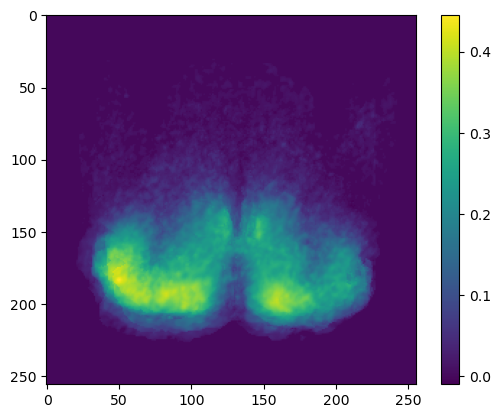

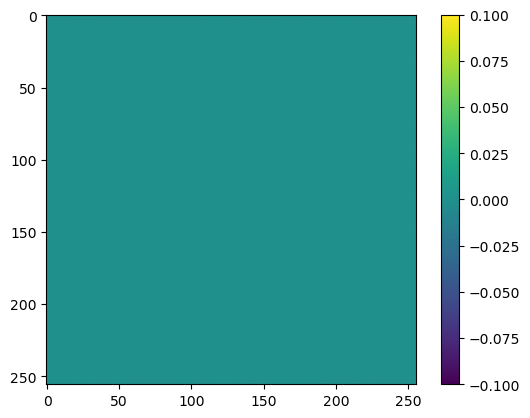

In [ ]:
a = np.mean(np.squeeze(mean_response[:,0,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()

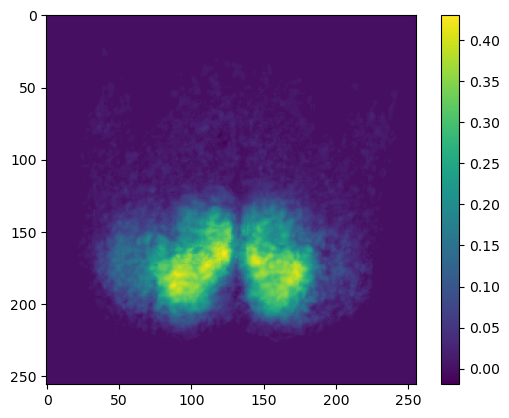

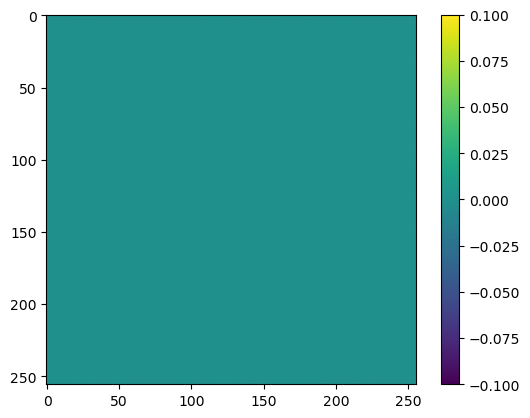

In [ ]:
a = np.mean(np.squeeze(mean_response[:,1,:,:,:]),0)
plt.imshow(a.max(2))
plt.colorbar()
plt.show()